<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/Socail-Network-Analysis-NetworKit/blob/master/NetworKit_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demonstration of networKit

In [ ]:
!git clone https://github.com/networkit/networkit.git

Cloning into 'networkit'...
remote: Enumerating objects: 78077, done.
remote: Counting objects: 100% (399/399), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 78077 (delta 221), reused 298 (delta 190), pack-reused 77678
Receiving objects: 100% (78077/78077), 259.62 MiB | 30.03 MiB/s, done.
Resolving deltas: 100% (56668/56668), done.


In [ ]:
!pip install networkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.5 MB/s eta 0:00:00


In [ ]:
import networkit as nk

In [ ]:
# create a small undirected graph with 5 nodes and 5 edges
G = nk.Graph(5)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(1, 3)
G.addEdge(2, 3)
G.addEdge(3, 4)


True

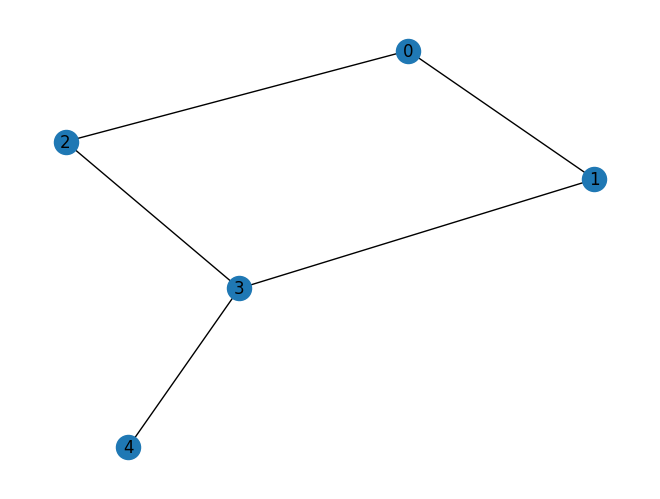

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3), (3, 4)])

# draw the graph
nx.draw(G, with_labels=True)
plt.show()


# calculate degree centrality for each node

In [ ]:
dc = nk.centrality.DegreeCentrality(G)
dc.run()
print("Degree centrality:", dc.ranking())


Degree centrality: [(3, 3.0), (0, 2.0), (1, 2.0), (2, 2.0), (4, 1.0)]


# calculate betweenness centrality for each node

In [ ]:

bc = nk.centrality.Betweenness(G)
bc.run()
print("Betweenness centrality:", bc.ranking())


Betweenness centrality: [(3, 7.0), (1, 2.0), (2, 2.0), (0, 1.0), (4, 0.0)]


## calculate shortest paths between all pairs of nodes

In [ ]:
G = nk.Graph(5)

# add edges to the graph
G.addEdge(0, 1)
G.addEdge(0, 3)
G.addEdge(1, 2)
G.addEdge(1, 3)
G.addEdge(2, 3)
G.addEdge(2, 4)
apsp = nk.distance.APSP(G)
apsp.run()

# get the matrix of shortest path lengths
shortest_paths = apsp.getDistances()

# print the shortest path between node 0 and all other nodes
for i, distance in enumerate(shortest_paths[0]):
    print("Shortest path between nodes 0 and {}: {}".format(i, distance))


Shortest path between nodes 0 and 0: 0.0
Shortest path between nodes 0 and 1: 1.0
Shortest path between nodes 0 and 2: 2.0
Shortest path between nodes 0 and 3: 1.0
Shortest path between nodes 0 and 4: 3.0


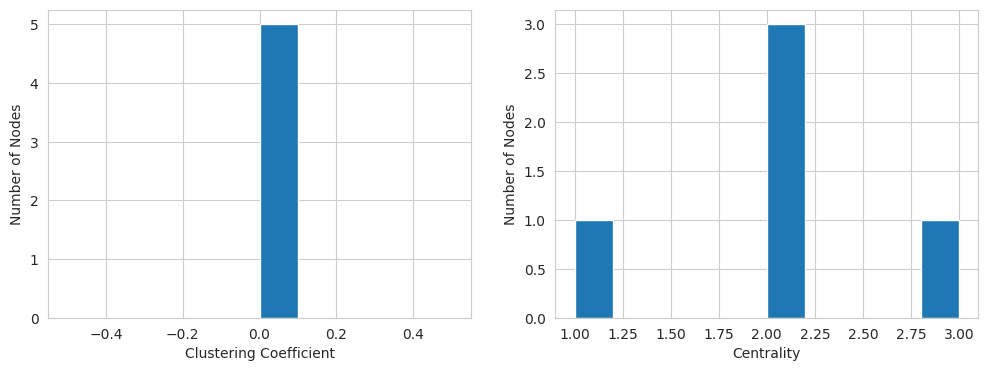

In [ ]:
import networkit as nk
import matplotlib.pyplot as plt

# create a small undirected graph with 5 nodes and 5 edges
G = nk.Graph(5)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(1, 3)
G.addEdge(2, 3)
G.addEdge(3, 4)

# calculate the clustering coefficient of each node
cc = nk.centrality.LocalClusteringCoefficient(G)
cc_values = cc.run().scores()

# calculate the centrality of each node
centrality = nk.centrality.DegreeCentrality(G)
centrality_values = centrality.run().scores()



# plot the clustering coefficient, centrality, and degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(cc_values, bins=10)
ax1.set_xlabel("Clustering Coefficient")
ax1.set_ylabel("Number of Nodes")

ax2.hist(centrality_values, bins=10)
ax2.set_xlabel("Centrality")
ax2.set_ylabel("Number of Nodes")



plt.show()


#Community Detection


In [ ]:
import networkit as nk
import matplotlib.pyplot as plt

# create a small undirected graph with 5 nodes and 5 edges
G = nk.Graph(5)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(1, 3)
G.addEdge(2, 3)
G.addEdge(3, 4)

# perform community detection using the Louvain algorithm
cd = nk.community.detectCommunities(G, algo=nk.community.PLM(G))



Communities detected in 0.00455 [s]
solution properties:
-------------------  ----
# communities        2
min community size   2
max community size   3
avg. community size  2.5
imbalance            1
edge cut             2
edge cut (portion)   0.4
modularity           0.08
-------------------  ----


#Parallelism
###The degree of parallelism can be controlled and monitored in the following way:

In [ ]:
print(nk.setNumberOfThreads(4)) # set the maximum number of available threads

None


In [ ]:
print(nk.getMaxNumberOfThreads()) # see maximum number of available threads

4


In [ ]:
print(nk.getCurrentNumberOfThreads()) # the number of threads currently executing

1


#Clustering Coefficient

In [ ]:
# create a small undirected graph with 5 nodes and 5 edges
G = nk.Graph(5)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(0, 3)
G.addEdge(1 ,2)
G.addEdge(3, 4)

# calculate the clustering coefficient of each node
cc = nk.centrality.LocalClusteringCoefficient(G)
print("Clustering coefficient of each node:", cc.run().scores())


Clustering coefficient of each node: [0.3333333333333333, 1.0, 1.0, 0.0, 0.0]
